In [36]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px 
import itertools

from prince import FAMD
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from kmodes.kprototypes import KPrototypes

import warnings
warnings.filterwarnings("ignore")

# Data Exploration & Cleaning

In [2]:
tfr = pd.read_csv('SunCountry.csv', 
                  chunksize=350000, 
                  iterator=True, 
                  dtype={12:str, 23:str}, 
                  parse_dates=['PNRCreateDate', 'ServiceStartDate', 'EnrollDate'])
df = pd.concat(tfr, ignore_index=True)
df

PNRLocatorID      TicketNum  CouponSeqNbr ServiceStartCity  \
0             AAABJK  3377365159634             2              JFK   
1             AAABJK  3377365159634             1              MSP   
2             AAABMK  3372107381942             2              MSP   
3             AAABMK  3372107381942             1              SFO   
4             AAABTP  3372107470782             1              MCO   
...              ...            ...           ...              ...   
3435383       ZZZDRU  3372107838142             1              MSP   
3435384       ZZZDTU  3372106802007             2              SFO   
3435385       ZZZDTU  3372106802007             1              MSP   
3435386       ZZZNBD  3372106947027             1              MSP   
3435387       ZZZYTJ  3372107725754             1              MSP   

        ServiceEndCity PNRCreateDate ServiceStartDate PaxName  \
0                  MSP    2013-11-23       2013-12-13  BRUMSA   
1                  JFK    2013-11-23       2013-12-08  BRUMSA   
2                  SFO    2014-02-04       2014-02-23  EILDRY   
3                  MSP    2014-02-04       2014-02-20  EILDRY   
4                  MSP    2014-03-13       2014-04-23  SKELMA   
...                ...           ...              ...     ...   
3435383            SEA    2014-08-23       2014-12-17  VAN WA   
3435384            MSP    2013-05-04       2013-07-14  STONDO   
3435385            SFO    2013-05-04       2013-07-10  STONDO   
3435386            SFO    2013-07-21       2013-08-22   CHORE   
3435387            RSW    2014-07-07       2014-09-28  LIDSRI   

                                                                                    EncryptedName  \
0                4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C4545   
1                4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C4545   
2                          45494C4445525344696420493F7C2067657420746869732072696768745259414E204C   
3                          45494C4445525344696420493F7C2067657420746869732072696768745259414E204C   
4                          534B454C544F4E44696420493F7C2067657420746869732072696768744D4152534841   
...                                                                                           ...   
3435383  56414E2042494E5342455247454E44696420493F7C20676574207468697320726967687457415252454E204A   
3435384          53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E   
3435385          53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E   
3435386                                43484F44696420493F7C20676574207468697320726967687452454941   
3435387                4C494453544F4E4544696420493F7C20676574207468697320726967687452494348415244   

        GenderCode  birthdateid   Age PostalCode BkdClassOfService  \
0                F      35331.0  66.0        NaN             Coach   
1                F      35331.0  66.0        NaN             Coach   
2                M      46161.0  37.0        NaN             Coach   
3                M      46161.0  37.0        NaN             Coach   
4                F      34377.0  69.0        NaN             Coach   
...            ...          ...   ...        ...               ...   
3435383          M      30152.0  82.0      56265             Coach   
3435384          M      35930.0  64.0      55116             Coach   
3435385          M      35930.0  64.0      55116             Coach   
3435386          F      52857.0  18.0      55449             Coach   
3435387          M      26632.0  91.0      33955       First Class   

          TrvldClassOfService        BookingChannel  BaseFareAmt  TotalDocAmt  \
0                       Coach       Outside Booking       234.20          0.0   
1                 First Class       Outside Booking       234.20          0.0   
2        Discount First Class   SCA Website Booking       293.96        338.0   
3       

Look at the dtypes to make sure all the data types are correct. If not, change them to the correct data type.

In [3]:
df.dtypes

PNRLocatorID                    object
TicketNum                        int64
CouponSeqNbr                     int64
ServiceStartCity                object
ServiceEndCity                  object
PNRCreateDate           datetime64[ns]
ServiceStartDate        datetime64[ns]
PaxName                         object
EncryptedName                   object
GenderCode                      object
birthdateid                    float64
Age                            float64
PostalCode                      object
BkdClassOfService               object
TrvldClassOfService             object
BookingChannel                  object
BaseFareAmt                    float64
TotalDocAmt                    float64
UFlyRewardsNumber              float64
UflyMemberStatus                object
CardHolder                      object
BookedProduct                   object
EnrollDate              datetime64[ns]
MarketingFlightNbr              object
MarketingAirlineCode            object
StopoverCode             

Check out the percentage of the null values in each of the columns.

In [4]:
(df.isnull().mean() * 100)

PNRLocatorID             0.000000
TicketNum                0.000000
CouponSeqNbr             0.000000
ServiceStartCity         0.000000
ServiceEndCity           0.000000
PNRCreateDate            0.000000
ServiceStartDate         0.000000
PaxName                  0.000000
EncryptedName            0.000000
GenderCode               1.280758
birthdateid              1.280758
Age                      1.280758
PostalCode              79.903493
BkdClassOfService        0.000000
TrvldClassOfService      0.000000
BookingChannel           0.000000
BaseFareAmt              0.000000
TotalDocAmt              0.000000
UFlyRewardsNumber       79.784525
UflyMemberStatus        79.784525
CardHolder              79.784525
BookedProduct           64.327639
EnrollDate              79.784525
MarketingFlightNbr       0.000000
MarketingAirlineCode     0.000000
StopoverCode            50.080340
dtype: float64

Looking at the result above, we can see that `UFlyRewardsNumber`, `UflyMemberStatus`, `CardHolder`, `EnrollDate` all have exactly the same number of null values, which probably means that these columns are all related to member status and need further investigation. As for other high missing percentage columns like `PostalCode`, `BookProduct`, `StopoverCode`, we will ignore them in the following analysis to make the process easier.

### Drop duplicated values

In [5]:
# Check out the number of duplicates and drop them
print(f'Number of duplicated: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

Number of duplicated: 142889


### Clean up airline code for only Sun Country

In [6]:
df = df[df['MarketingAirlineCode'] == 'SY']

### Handle outliers in age column (Impute with na first and will handle with the inputation later)

In [7]:
df.loc[~df['Age'].between(0, 120), 'Age'] = np.nan  # 120 is the max age according to world records

### Add some columns that might be useful

In [8]:
# A boolean column to see if there is a discount code for the tiecket
df['DiscountCode'] = df['BookedProduct'].notna()  
# To calculate how many days earlier that cusomer book their flight.
df['AdvanceBookingTime'] = (df['ServiceStartDate'] - df['PNRCreateDate']).dt.days 
# A booklean column to identify whether the ticket is upgraded or not
df['Upgraded'] = (((df['BkdClassOfService'] == 'Coach') & (df['TrvldClassOfService'] != 'Coach')) | 
                    ((df['BkdClassOfService'] == 'Discount First Class') & (df['TrvldClassOfService'] == 'First Class')))
# A booklean column to identify whether the ticket is downgrade or not
df['Downgraded'] = (((df['BkdClassOfService'] == 'First Class') & (df['TrvldClassOfService'] != 'First Class')) | 
                    ((df['BkdClassOfService'] == 'Discount First Class') & (df['TrvldClassOfService'] == 'Coach')))
# Unique identifier for each ticket(entry)
df['Id'] = df['PNRLocatorID'] + '-'+ df['TicketNum'].astype(str) + '-' + \
            df['CouponSeqNbr'].astype(str)
# Unique identifier for each customer
df['UserId'] = df['EncryptedName'] + '-' + df['birthdateid'].astype(str)

# Convert stopover types into easier to understand format
df['StopoverCode'] = df['StopoverCode'].map({'O':'short layover', 'X':'long layover', np.nan:'direct'})


### Clean up the duplicated rows again

Initially, we thought the `Id` columns we create could be the unique identifier for each ticket (entry). However, we still found out that there were some duplicated rows in the data. Given that less than 100 rows have this problem, we believe this is not a severe issue. We proceeded with our analysis by simply cleaning up the duplicated rows.

In [9]:
df.drop_duplicates(subset=['PNRLocatorID', 'TicketNum', 'CouponSeqNbr', 'UserId'], inplace=True, ignore_index=True)

### Identify different trip types

In [10]:
# for member data
g_trip_status = df.groupby(['UserId', 'PNRLocatorID', 'TicketNum'], as_index=False)['CouponSeqNbr'].nunique()

g_trip_status.loc[g_trip_status['CouponSeqNbr'] == 1, 'TripStatus'] = 'one-way'
g_trip_status.loc[g_trip_status['CouponSeqNbr'] == 2, 'TripStatus'] = 'round-trip'
g_trip_status.loc[g_trip_status['CouponSeqNbr'] > 2, 'TripStatus'] = 'multi-cities'

g_trip_status = g_trip_status.groupby('UserId')['TripStatus'].value_counts().unstack().fillna(0)
g_trip_status

TripStatus                                                                                          multi-cities  \
UserId                                                                                                             
4120414C52484D414E44696420493F7C2067657420746869732072696768745A494144-47687.0                               0.0   
414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E-50666.0                             0.0   
4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E4359-39435.0                     0.0   
41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F50484552-40549.0           0.0   
41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E-48964.0               0.0   
...                                                                                                          ...   
5A595749454344696420493F7C2067657420746869732072696768744A414D4553-37368.0                                   0.0   
5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F53455048-37368.0                     0.0   
5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D4553-47616.0                     0.0   
5A59574F544B4F44696420493F7C206765742074686973207269676874414D59-44938.0                                     0.0   
5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C-44938.0                                 0.0   

TripStatus                                                                                          one-way  \
UserId                                                                                                        
4120414C52484D414E44696420493F7C2067657420746869732072696768745A494144-47687.0                          1.0   
414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E-50666.0                        1.0   
4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E4359-39435.0                1.0   
41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F50484552-40549.0      0.0   
41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E-48964.0          0.0   
...                                                                                                     ...   
5A595749454344696420493F7C2067657420746869732072696768744A414D4553-37368.0                              0.0   
5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F53455048-37368.0                1.0   
5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D4553-47616.0                0.0   
5A59574F544B4F44696420493F7C206765742074686973207269676874414D59-44938.0                                0.0   
5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C-44938.0                            0.0   

TripStatus                                                                                          round-trip  
UserId                                                                                                          
4120414C52484D414E44696420493F7C2067657420746869732072696768745A494144-47687.0                             0.0  
414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E-50666.0                           0.0  
4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E4359-39435.0                   0.0  
41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F50484552-40549.0         1.0  
41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E-48964.0             1.0  
...                                                                                                        ...  
5A595749454344696420493F7C2067657420746869732072696768744A414D4553-37368.0                                 1.0  
5A595749454344696420493F7C2067

With the above calculation, we create 3 new columns to identify the number of different `trip types` for each customer: 
* OneWay
* RoundTrip
* MultiCity

We believe this feature might help separate the customers into different groups.

### Identify top booking channels

We also want to know the top channel that each customer uses to book the ticket. Hence, We created a new column `TopChannel` to store the most used booking medium of each customer.

In [11]:
g_top_chaneel = df.groupby('UserId', as_index=False)['BookingChannel'].value_counts().sort_values(by='count').drop_duplicates(subset=['UserId'], keep='last').drop(columns=['count']).rename(columns={'BookingChannel':'top_channel'})
g_top_chaneel.set_index('UserId', inplace=True)
g_top_chaneel.loc[~g_top_chaneel['top_channel'].isin(['Outside Booking', 'SCA Website Booking', 'Reservations Booking',
       'Tour Operator Portal', 'SY Vacation']), 'top_channel'] = 'Airport'
g_top_chaneel

top_channel
UserId                                                                                                    
4120414C52484D414E44696420493F7C2067657420746869732072696768745A494144-47687.0         SCA Website Booking
4B48414E44696420493F7C20676574207468697320726967687454415553454546204E-52726.0         SCA Website Booking
4B48414E44696420493F7C20676574207468697320726967687454415553454546-48157.0                 Outside Booking
4B48414E44696420493F7C2067657420746869732072696768745441534D494148-51741.0                 Outside Booking
4B48414E44696420493F7C20676574207468697320726967687454414C4841-50327.0                     Outside Booking
...                                                                                                    ...
4A4F5244414E44696420493F7C2067657420746869732072696768744B454C4C59-43664.0             SCA Website Booking
455249434B534F4E44696420493F7C2067657420746869732072696768744B494D4245524C59-48075.0  Reservations Booking
4A4F484E53544F4E44696420493F7C2067657420746869732072696768745259414E-40512.0           SCA Website Booking
534F4C4F4E44696420493F7C2067657420746869732072696768744A414E204B-45153.0                   Outside Booking
425552444554544544696420493F7C206765742074686973207269676874524F42455254-44358.0      Reservations Booking

[1541974 rows x 1 columns]

## Create new dataframe in customer level

Now, we want to create a new dataframe that contains all the information about each customer. We will use the `user_id` column as the unique identifier for each customer, and using aggregation functions to calculate the different fields for each customer.

In [12]:
# Aggregate the data for each customer
member = df.groupby('UserId', as_index=False) \
           .agg(
                age = ('Age', 'mean'),
                gender = ('GenderCode', 'max'),  # Feamale, Male, Unknown
                is_member = ('EnrollDate', 'max'),  # Boolean column to identify whether the customer is a member or not
                card_holder = ('CardHolder', 'max'),  # Boolean column to identify whether the customer is a card holder or not
                avg_book_advanced = ('AdvanceBookingTime', 'mean'),  # Average days between booking and service start
                num_of_flights = ('PNRLocatorID', 'count'),
                num_of_upgrade = ('Upgraded', 'sum'),
                num_of_downgrade = ('Downgraded', 'sum'),
                num_of_discount = ('DiscountCode', 'sum'),
                basefare_amt = ('BaseFareAmt', 'sum'),
                total_amt = ('TotalDocAmt', 'sum')
            ) \
            .join(g_trip_status, on='UserId') \
            .join(g_top_chaneel, on='UserId') \
            .rename(columns={'UserId': 'user_id'})

# Remap the boolean values to numeric values
member['is_member'] = member['is_member'].notna().map({True:1, False:0})
member['card_holder'] = member['card_holder'].fillna(False).map({True:1, False:0})

# Impute missing values for gender
member['gender'].fillna('U', inplace=True)

member

user_id  \
0                            4120414C52484D414E44696420493F7C2067657420746869732072696768745A494144-47687.0   
1                          414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E-50666.0   
2                  4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E4359-39435.0   
3        41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F50484552-40549.0   
4            41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E-48964.0   
...                                                                                                     ...   
1541969                          5A595749454344696420493F7C2067657420746869732072696768744A414D4553-37368.0   
1541970            5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F53455048-37368.0   
1541971            5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D4553-47616.0   
1541972                            5A59574F544B4F44696420493F7C206765742074686973207269676874414D59-44938.0   
1541973                        5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C-44938.0   

          age gender  is_member  card_holder  avg_book_advanced  \
0        33.0      M          0            0                7.0   
1        24.0      M          0            0               50.0   
2        54.0      F          0            0                0.0   
3        52.0      M          0            0               12.5   
4        29.0      M          1            0               10.0   
...       ...    ...        ...          ...                ...   
1541969  61.0      M          0            0              123.0   
1541970  61.0      M          0            0                0.0   
1541971  32.0      M          0            0               59.5   
1541972  40.0      F          1            0               45.5   
1541973  39.0      F          1            0              145.5   

         num_of_flights  num_of_upgrade  num_of_downgrade  num_of_discount  \
0                     1               0                 0                0   
1                     1               1                 0                0   
2                     1               0                 0                0   
3                     2               0                 0                2   
4                     2               2                 0                0   
...                 ...             ...               ...              ...   
1541969               2               0                 0                0   
1541970               1               0                 0                0   
1541971               2               0                 0                0   
1541972               2               0                 0                0   
1541973               2               0                 0                0   

         basefare_amt  total_amt  multi-cities  one-way  round-trip  \
0              151.63      174.0           0.0      1.0         0.0   
1              205.58      231.9           0.0      1.0         0.0   
2              264.19      294.9           0.0      1.0         0.0   
3                0.00        0.0           0.0      0.0         1.0   
4              865.12      973.6           0.0      0.0         1.0   
...               ...        ...           ...      ...         ...   
1541969        405.60      479.6           0.0      0.0         1.0   
1541970        378.60      418.0           0.0      1.0         0.0   
1541971        625.12      715.6           0.0      0.0         1.0   
1541972        440.92      518.0           0.0      0.0         1.0   
1541973        513.48      595.2           0.0      0.0         1.0   

                  top_channel  
0         SCA Website Booking  
1             Outside Booking  
2                     Airport  
3        Tour Operator Portal  
4           

### Inputation for missing values

Next, let's handle the missing values problem in the new dataframe. We will use the median age to impute the missing values in `age`.

In [13]:
from sklearn.impute import SimpleImputer
# Impute na value with mean for age column
median_immputer = SimpleImputer(missing_values=np.nan, strategy='median').fit(member[['age']])
print(f'Impute value for age is: {median_immputer.statistics_[0]}')

member['age'] = median_immputer.transform(member[['age']])
member['age'] = member['age'].astype(int)  # Convert to int for easier aggregation later

Impute value for age is: 39.0


In [14]:
(member.isnull().mean() * 100)

user_id              0.0
age                  0.0
gender               0.0
is_member            0.0
card_holder          0.0
avg_book_advanced    0.0
num_of_flights       0.0
num_of_upgrade       0.0
num_of_downgrade     0.0
num_of_discount      0.0
basefare_amt         0.0
total_amt            0.0
multi-cities         0.0
one-way              0.0
round-trip           0.0
top_channel          0.0
dtype: float64

Now, we have a clean customer level dataframe with no missing values. We will use this dataframe to do the analysis in the following sections.

# Pre-processing before clustering

In [15]:
member_original = member.copy()
member.drop(columns=['user_id', 'basefare_amt'], inplace=True)

Before conduting dimension reduction, we need to scale the numerical columns first. Here, We simply choose the `StandardScaler` function to do the scaling.

In [16]:
cat_selector = ['gender', 'is_member', 'card_holder', 'top_channel', 'TripStatus']
num_selector = ['age', 'avg_book_advanced', 'num_of_flights', 'num_of_upgrade', 'num_of_downgrade',
                'num_of_discount', 'total_amt', 'multi-cities', 'one-way', 'round-trip']

In [17]:
member_scaled = member.copy()
member_scaled[num_selector] = StandardScaler().fit_transform(member_scaled[num_selector])
member_scaled

age gender  is_member  card_holder  avg_book_advanced  \
0       -0.340334      M          0            0          -0.970277   
1       -0.812880      M          0            0          -0.159390   
2        0.762274      F          0            0          -1.102282   
3        0.657264      M          0            0          -0.866559   
4       -0.550354      M          1            0          -0.913704   
...           ...    ...        ...          ...                ...   
1541969  1.129810      M          0            0           1.217232   
1541970  1.129810      M          0            0          -1.102282   
1541971 -0.392839      M          0            0           0.019759   
1541972  0.027202      F          1            0          -0.244251   
1541973 -0.025303      F          1            0           1.641533   

         num_of_flights  num_of_upgrade  num_of_downgrade  num_of_discount  \
0             -0.829275       -0.188393         -0.030851        -0.626891   
1             -0.829275        1.615537         -0.030851        -0.626891   
2             -0.829275       -0.188393         -0.030851        -0.626891   
3             -0.096708       -0.188393         -0.030851         1.086401   
4             -0.096708        3.419468         -0.030851        -0.626891   
...                 ...             ...               ...              ...   
1541969       -0.096708       -0.188393         -0.030851        -0.626891   
1541970       -0.829275       -0.188393         -0.030851        -0.626891   
1541971       -0.096708       -0.188393         -0.030851        -0.626891   
1541972       -0.096708       -0.188393         -0.030851        -0.626891   
1541973       -0.096708       -0.188393         -0.030851        -0.626891   

         total_amt  multi-cities   one-way  round-trip           top_channel  
0        -0.725905      -0.14264  0.843280   -1.228344   SCA Website Booking  
1        -0.640401      -0.14264  0.843280   -1.228344       Outside Booking  
2        -0.547366      -0.14264  0.843280   -1.228344               Airport  
3        -0.982860      -0.14264 -0.464716    0.219281  Tour Operator Portal  
4         0.454905      -0.14264 -0.464716    0.219281       Outside Booking  
...            ...           ...       ...         ...                   ...  
1541969  -0.274610      -0.14264 -0.464716    0.219281       Outside Booking  
1541970  -0.365578      -0.14264  0.843280   -1.228344       Outside Booking  
1541971   0.073904      -0.14264 -0.464716    0.219281   SCA Website Booking  
1541972  -0.217903      -0.14264 -0.464716    0.219281   SCA Website Booking  
1541973  -0.103897      -0.14264 -0.464716    0.219281       Outside Booking  

[1541974 rows x 14 columns]

### FAMD

For dimension reduction, we choose `Factor Analysis of Mixed Data (FAMD)`, a generalization of PCA that can be used for mixed data to reduce the dimension. More specifically, we can say that FAMD works as a `Principal Components Analysis (PCA)` for quantitative variables and a `Multiple Correspondence Analysis (MCA)` for qualitative variables. 

Fortunately, a python package called `prince` is already available and could be easy to implement in our analysis.

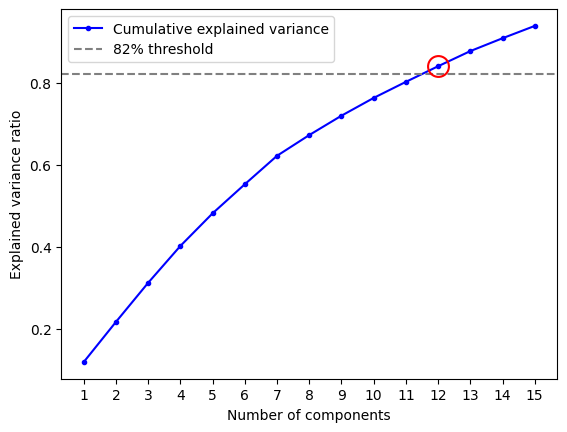

In [18]:
famd = FAMD(n_components=15,
            n_iter=3,
            copy=True,
            check_input=True,
            engine='auto',
            random_state=42).fit(member_scaled)

explain_var_cumsum = famd.explained_inertia_.cumsum()
plt.plot(range(1, len(explain_var_cumsum)+1), explain_var_cumsum, 'b.-', label='Cumulative explained variance')
plt.axhline(0.82, linestyle='--', color='grey', label='82% threshold')
plt.plot(12, explain_var_cumsum[11], 'o', ms=15, mec='r', mfc='none', mew=1.5)
plt.xticks(range(1, len(explain_var_cumsum)+1))
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend()

Looking at the graph, we can see that we need 12 components to obatin at least 82% of the original variance. We will use 12 components for the following analysis.

In [19]:
famd = FAMD(n_components=12,
            n_iter=3,
            copy=True,
            check_input=True,
            engine='auto',
            random_state=42).fit(member_scaled)

total_var = famd.explained_inertia_.sum()

This package also allow us to inspect the correlation of each component with original features

In [20]:
feature_corr = famd.column_correlations(member_scaled)
feature_corr

0         1         2         3   \
age                               0.138420  0.045278 -0.122912  0.020824   
avg_book_advanced                 0.136891 -0.202016  0.729582  0.095816   
card_holder                       0.123115  0.091245 -0.058676  0.080673   
gender_F                         -0.006953 -0.024647  0.024479 -0.003360   
gender_M                          0.003805  0.033535 -0.053341  0.002620   
gender_U                          0.015755 -0.044295  0.144079  0.003712   
is_member                         0.322208  0.211584 -0.168526  0.175772   
multi-cities                      0.094605  0.260694 -0.161306  0.254818   
num_of_discount                   0.542525  0.389768 -0.030438  0.404660   
num_of_downgrade                  0.104744  0.085825  0.041188  0.068597   
num_of_flights                    0.928191  0.916237 -0.554903  0.906665   
num_of_upgrade                    0.501559  0.555814 -0.438152  0.461217   
one-way                           0.091038  0.192127 -0.192108 -0.122997   
round-trip                        0.828733  0.693653 -0.376707  0.861019   
top_channel_Airport              -0.017002 -0.003147 -0.021335 -0.026079   
top_channel_Outside Booking      -0.120932 -0.032140 -0.059964 -0.036692   
top_channel_Reservations Booking  0.025668 -0.035255  0.141930 -0.001737   
top_channel_SCA Website Booking   0.101392  0.054978 -0.010100  0.035629   
top_channel_SY Vacation           0.063221  0.006251  0.076645  0.049921   
top_channel_Tour Operator Portal -0.024050 -0.019674 -0.043421 -0.026743   
total_amt                         0.787519  0.789164 -0.438040  0.814251   

                                        4         5         6         7   \
age                               0.016613  0.043760  0.111761  0.051109   
avg_book_advanced                -0.484655 -0.461505 -0.342003 -0.393931   
card_holder                       0.018746  0.083068  0.063663  0.035187   
gender_F                         -0.002468 -0.030545 -0.035748 -0.033183   
gender_M                          0.005438  0.046717  0.044082  0.042889   
gender_U                         -0.014829 -0.080659 -0.041476 -0.048343   
is_member                        -0.032278  0.187654  0.154971  0.082086   
multi-cities                     -0.184787  0.210552  0.191716  0.138294   
num_of_discount                   0.759888  0.367022  0.311477  0.201806   
num_of_downgrade                  0.004234  0.110491  0.107832  0.131115   
num_of_flights                    0.198107  0.761794  0.293575  0.060149   
num_of_upgrade                    0.085471  0.550642  0.249329  0.152626   
one-way                          -0.018457  0.540478  0.907653  0.896374   
round-trip                        0.281515  0.368759 -0.289538 -0.492259   
top_channel_Airport               0.036900  0.025835  0.054850  0.052751   
top_channel_Outside Booking      -0.107323 -0.022832 -0.077464 -0.049299   
top_channel_Reservations Booking -0.035445 -0.059760  0.004107 -0.005277   
top_channel_SCA Website Booking  -0.048628  0.050168  0.087961  0.058307   
top_channel_SY Vacation           0.075038 -0.044895 -0.044027 -0.063448   
top_channel_Tour Operator Portal  0.363964  0.029700 -0.010886  0.019453   
total_amt                        -0.188500  0.515028  0.118883 -0.126647   

                                        8         9         10        11  
age                              -0.002330 -0.497819 -0.339999  0.229988  
avg_book_advanced                -0.458448 -0.067767 -0.029693  0.095451  
card_holder                       0.021367 -0.093066 -0.032407  0.002991  
gender_F                         -0.034503 -0.008195 -0.010077  0.003548  
gender_M                          0.045185  0.008224  0.008600 -0.007857  
gender_U                         -0.053214 -0.000111  0.007421  0.021512  
is_member                         0.028188 -0.204737 -0.029818  0.014947  
multi-cities                      0.288682  0.815557 -0.782745  0.089224  
num_of_discount    

Now, let's use row_coordinates function to generate the transformed data.

In [21]:
member_trasformed = famd.row_coordinates(member_scaled)
member_trasformed

0         1         2         3         4         5   \
0       -0.515661  0.678173 -0.128369 -1.565873 -0.198350 -0.014072   
1       -1.104228  1.103525  0.032368  0.173560 -0.241400  0.113415   
2       -1.128599 -0.646397 -0.266834 -1.122430  1.261224  2.224766   
3       -0.348125  0.768258  0.059538 -0.510751  3.857042  0.771663   
4        0.259477  1.337871 -0.228578  0.749863 -0.226405  0.306110   
...           ...       ...       ...       ...       ...       ...   
1541969 -0.617485  1.058149  0.145952  0.485514 -0.310924 -0.130314   
1541970 -1.254133  1.075240 -0.027387  0.029897 -0.169474  0.090667   
1541971  0.206661  0.755142 -0.094072 -1.022717 -0.258099 -0.102252   
1541972  0.587996 -1.034179 -0.513481 -0.736816 -0.346646  0.029713   
1541973 -0.168736 -0.729034 -0.200609  0.866364 -0.516241 -0.045081   

                6         7         8         9         10        11  
0        -0.075213  0.272430  0.450633  0.241106  0.182761 -0.123118  
1         0.010722  0.455414  0.496743 -0.248716  0.396966 -0.251513  
2        12.898121 -1.077632 -0.670422  0.008345 -0.194648  0.145949  
3        -0.683062 -0.285391 -0.187024 -0.092114 -0.361780  0.185094  
4        -0.012896  0.156975  0.118731 -0.822046  0.085296 -0.318818  
...            ...       ...       ...       ...       ...       ...  
1541969  -0.104879 -0.410389 -0.404743 -0.467075 -0.177052  0.241937  
1541970   0.023438  0.496575  0.522433 -0.452553 -0.114085  0.122277  
1541971  -0.176697 -0.496133 -0.291527  0.360465  0.129156 -0.054117  
1541972  -0.068870 -0.213038 -0.170812 -0.285515 -0.286051  0.013266  
1541973  -0.014669 -0.252777 -0.396061 -0.718088 -0.316383  0.135748  

[1541974 rows x 12 columns]

# Clustering

### K-Prototypes, K-Medoids, DBSCAN Model

K-Prototypes is the first choice that comes into our mind, given its capability to handle mixed data. However, we found that it is not very efficient to train such a vast amount of data with over 1 million rows. It takes more than 2 hours to generate the clustering result ( which is clearly not suitable if we want to use this algorithm to find the best natural cluster number), so it is not very practical to use in this project. 

As for KMedoids and DBSCAN, the former suffers the same issue that K-Portotypes encounter and the latter report a memory error when we feed in the data. Therefore, we decided to move on to K-Means and  Gaussian Mixture Model to do the clustering.

In [22]:
# # Caution: this is a very slow process, and will take a long time to run

# # Train KPototypes model
# kp_model = KPrototypes(n_clusters=3, random_state=43)
# cls_assignment = kp_model.fit_predict(member.values, categorical=[1])

# # Train KMedoids model
# km = KMedoids(n_clusters=3, method='pam', random_state=4) 
# cls_assignment = km.fit_predict(member_trasformed.iloc[:50000].values)

# # Train DBSCAN model
# dbscan = DBSCAN(eps=0.3)
# cls = dbscan.fit_predict(member_trasformed.iloc[:50000].values)

### KMeans

The next thing we try is KMeans; it works efficiently and generates the clustering result in a reasonable amount of time. However, we found that the result is not very satisfying because it is hard to find the best natural cluster number with the elbow method.

Text(0, 0.5, 'SSE')

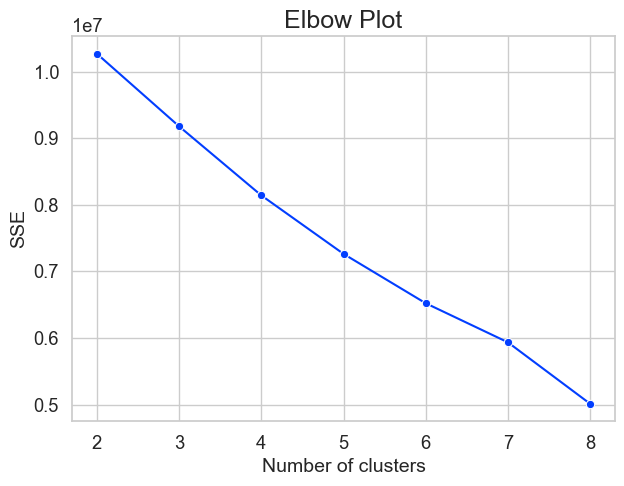

In [23]:
cost_values = []
no_of_clusters = list(range(2, 9))

for k in no_of_clusters:
    km = KMeans(n_clusters=k, random_state=4).fit(member_trasformed.values)
    cost_values.append(km.inertia_)

sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
plt.figure(figsize=(7, 5))
ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
ax.set_xticks(no_of_clusters)
ax.set_title('Elbow Plot', fontsize=18)
ax.set_xlabel('Number of clusters', fontsize=14)
ax.set_ylabel('SSE', fontsize=14)

### Gaussian Mixture Model

Gaussion Mixture Model is the last algorithm we try. It is also very efficient and generates the clustering result in a reasonable amount of time. We also found that it is easier to find the best natural cluster number with the `information-theoretic criteria (BIC)` method, which concerns both the covariance type and the number of components in the model.

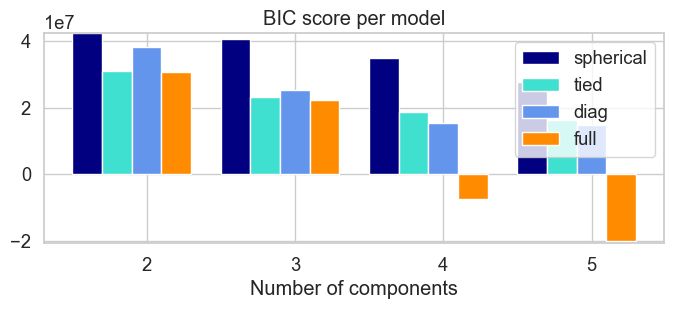

In [26]:
lowest_bic = np.infty
bic = []
n_components_range = range(2, 6)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type, random_state=4)
        gmm.fit(member_trasformed.values)
        bic.append(gmm.bic(member_trasformed.values))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []


# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
# plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

Looking at the BIC plot, we can see that the best natural cluster number is 5 with the `full variance covariance` matrix. Here, we ignore the cluster numbers bigger than 5  which have potentially lower BIC scores because they are hard to apply to the real business setting.

### Final Clustering Result

In [28]:
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=4)
class_assignment = gmm.fit_predict(member_trasformed.values)
member_original['cluster'] = class_assignment

In [32]:
# Visualize the number of customer in each cluster
member_original.groupby('cluster')['age'].count()

cluster
0    741116
1     15540
2      5427
3    684451
4     95440
Name: age, dtype: int64

In [33]:
# Quick Summary of the characteristics of each cluster
member_original.groupby('cluster').mean()

age  is_member  card_holder  avg_book_advanced  num_of_flights  \
cluster                                                                         
0        40.070762   0.209411     0.000000          61.312377        1.907740   
1        38.999356   0.075418     0.003218         134.012639        1.897297   
2        40.606781   0.166575     0.011977          16.704881        1.881150   
3        37.964858   0.078740     0.000000          53.955363        1.996055   
4        45.803594   0.602651     0.108791          58.562304        4.901037   

         num_of_upgrade  num_of_downgrade  num_of_discount  basefare_amt  \
cluster                                                                    
0              0.037554          0.000000         0.838450    514.630101   
1              0.012484          0.005084         1.552124    660.894779   
2              0.102266          0.002027         1.112769    312.105390   
3              0.066566          0.000000         0.434671    575.700404   
4              0.910457          0.024403         1.879223   1571.758092   

           total_amt  multi-cities   one-way  round-trip  
cluster                                                   
0         592.646825      0.000000  0.314443    0.796649  
1         723.023020      0.007915  0.174389    0.845946  
2         361.881900      0.014373  0.837848    0.494564  
3         588.536327      0.033744  0.284346    0.789772  
4        1791.963376      0.087573  1.183246    1.693231

In [34]:
# Look at the distribution of the top channel for each cluster
member_original.groupby(['cluster'])['top_channel'].value_counts()

cluster  top_channel         
0        SCA Website Booking     574125
         Reservations Booking     67122
         Tour Operator Portal     61854
         SY Vacation              38015
1        Reservations Booking     11888
         Outside Booking           1696
         SCA Website Booking       1456
         SY Vacation                338
         Tour Operator Portal       162
2        Airport                   5427
3        Outside Booking         684451
4        SCA Website Booking      75564
         Outside Booking          11918
         Reservations Booking      6926
         SY Vacation                938
         Tour Operator Portal        94
Name: top_channel, dtype: int64

In [37]:
import plotly
plotly.offline.init_notebook_mode()
# Look at the smaple (50K) distribution of different clusters in 3D space (top 3 dimension with highest explaining variance)
fig = px.scatter_3d(
    member_trasformed.iloc[:50000], x=0, y=1, z=2, color=member_original['cluster'].iloc[:50000],opacity=0.4,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

With the graph above, we can inspect how customers are separated into five different clusters in the 3D space. Although the result does not generate perfect boundaries for each group, we can discover that some clusters are distributed differently, which might be helpful for the company to utilize to segment the customer base.

For the rest of the analysis, we will use Tableau to help us better understand the cluster with visualization. The link to the dashboard is [here](https://public.tableau.com/app/profile/jerrylin0505/viz/AirlineAnalysis_16671627272710/AirlineAnalysis).